In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data=pd.read_excel('/content/iris (3).xls')

In [3]:
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**DATA VISUALISATION &PREPROCESSING**

In [6]:
# Check for missing values
missing_values = iris_data.isnull().sum()
print(missing_values)

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64


In [7]:
# Handling missing values by replacing NaNs with the mean of respective columns
iris_data.fillna(iris_data.mean(), inplace=True)

<ipython-input-7-12c65f6763b2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data.fillna(iris_data.mean(), inplace=True)


In [9]:
# Check for missing values
missing_values = iris_data.isnull().sum()
print(missing_values)

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64


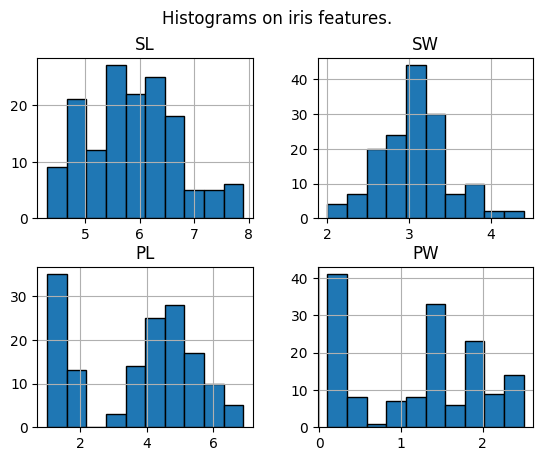

In [10]:
#HISTOGRAM
iris_data.hist(edgecolor='black',linewidth=1)
plt.suptitle('Histograms on iris features.')
plt.show()


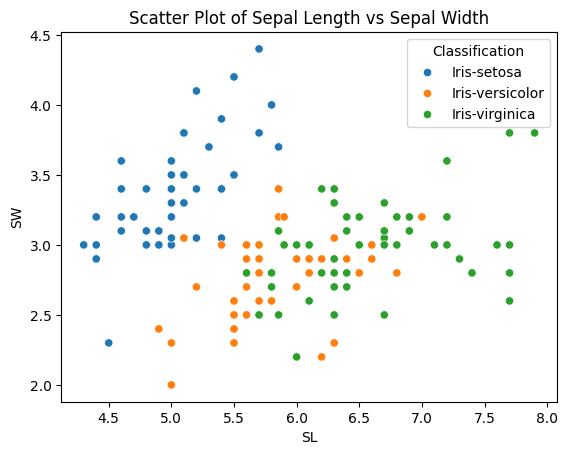

In [11]:
#SCATTER PLOT
sns.scatterplot(data=iris_data, x='SL', y='SW', hue='Classification')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

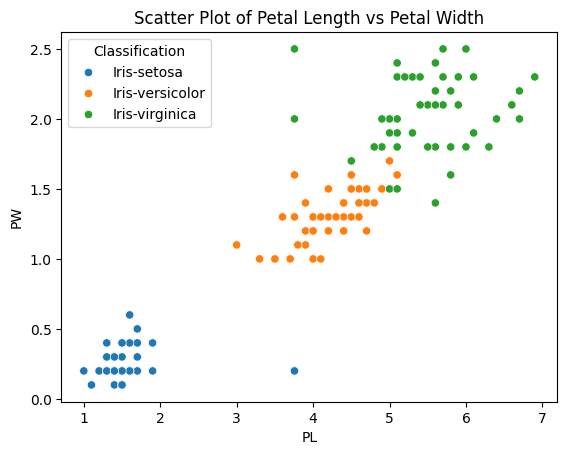

In [12]:

sns.scatterplot(data=iris_data, x='PL', y='PW', hue='Classification')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

Text(0.5, 0.98, 'Box Plot of Iris Dataset')

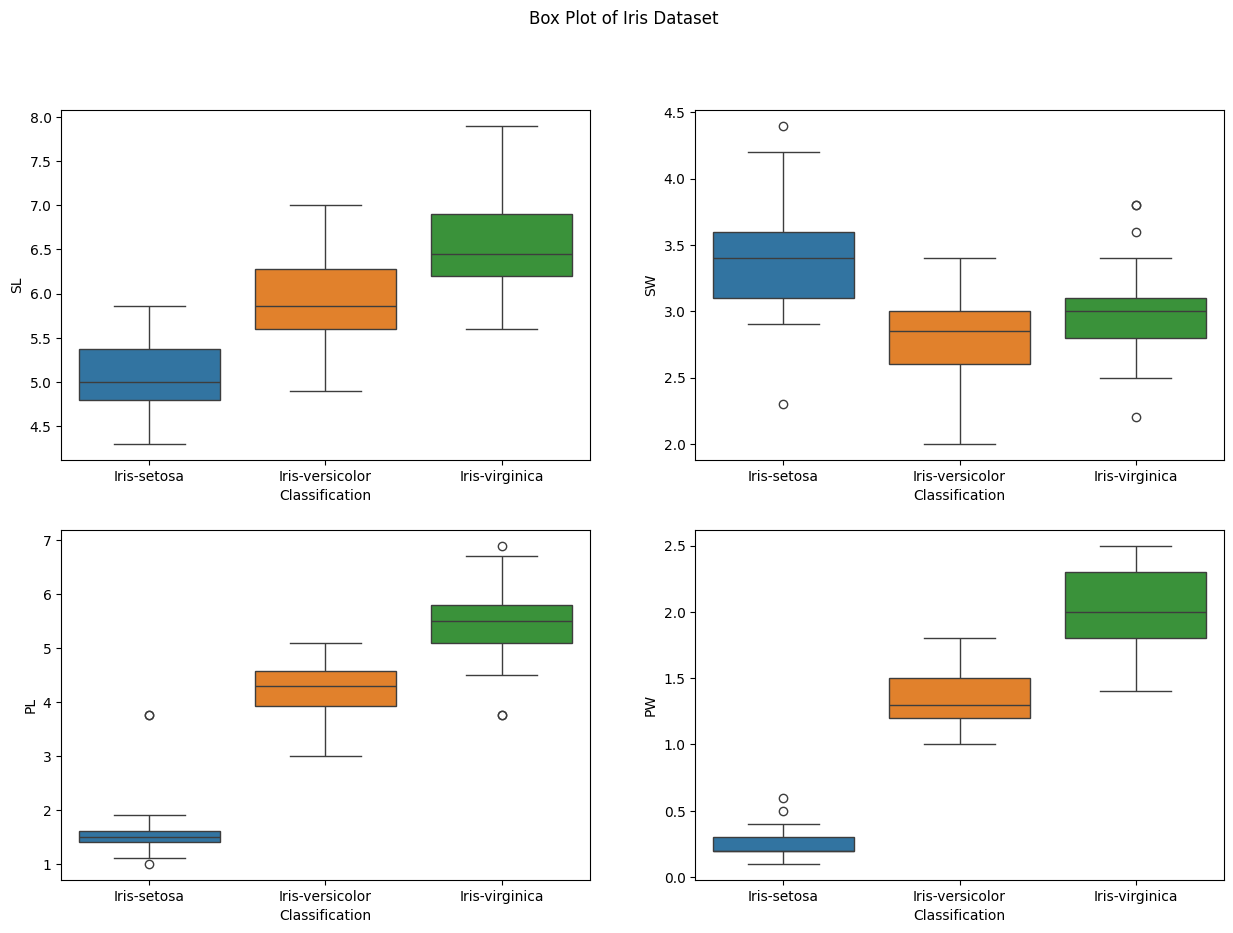

In [13]:
#BOXPLOT
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Classification', y = 'SL', data=iris_data,hue = 'Classification')
plt.subplot(2,2,2)
sns.boxplot(x='Classification', y = 'SW', data=iris_data,hue = 'Classification')
plt.subplot(2,2,3)
sns.boxplot(x='Classification', y = 'PL', data=iris_data,hue = 'Classification')
plt.subplot(2,2,4)
sns.boxplot(x='Classification', y = 'PW', data=iris_data,hue = 'Classification')
plt.suptitle("Box Plot of Iris Dataset")

<Figure size 2000x1500 with 0 Axes>

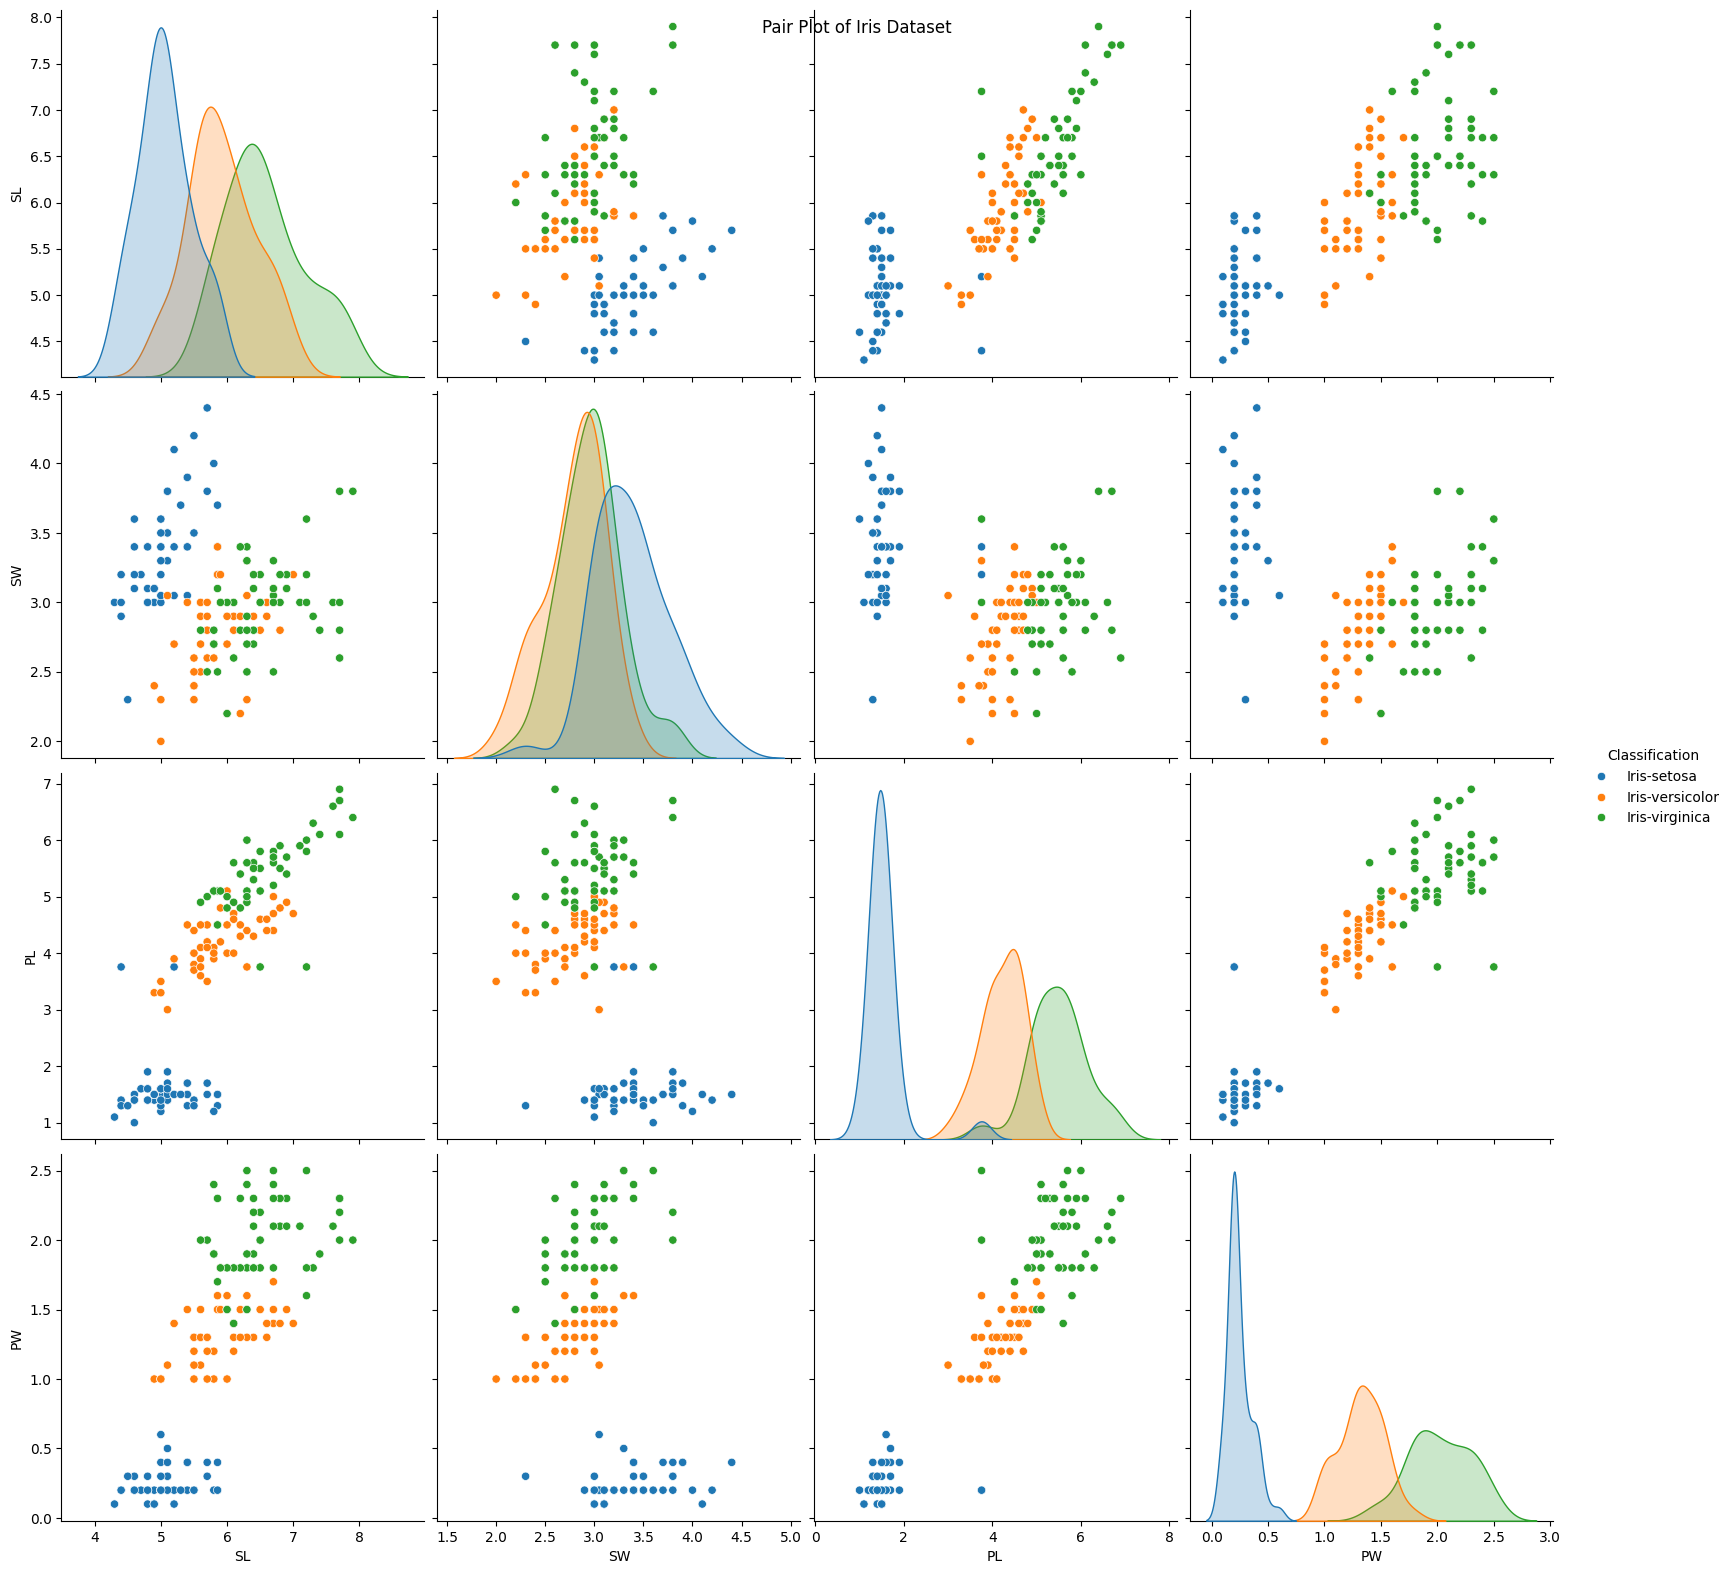

In [14]:
#PAIR PLOT
plt.figure(figsize=(20,15))
sns.pairplot(iris_data,hue = 'Classification',height=4)
plt.suptitle("Pair Plot of Iris Dataset")
plt.show()

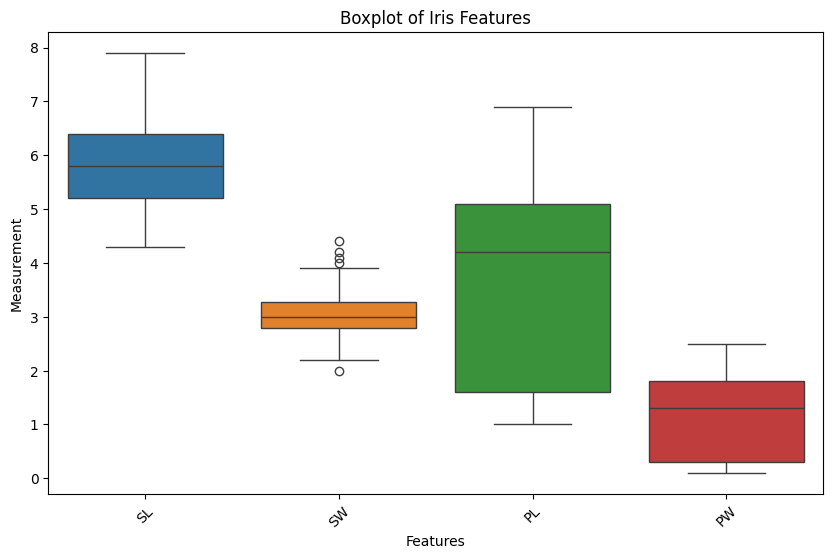

In [15]:
#CHECKING FOR OUTLIERS
# Create boxplots for each numerical feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_data.drop('Classification', axis=1))
plt.title('Boxplot of Iris Features')
plt.xlabel('Features')
plt.ylabel('Measurement')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


 #no outliers

<ipython-input-16-94a6a290225d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm')


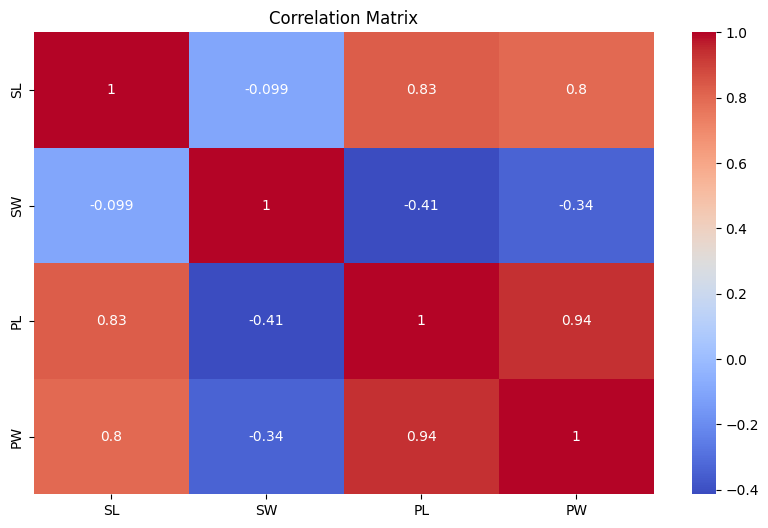

In [16]:
# Correlation heatmap to visualize the correlation between features

plt.figure(figsize=(10, 6))
sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encoding categorical variable 'Classification'
label_encoder = LabelEncoder()
iris_data['Classification'] = label_encoder.fit_transform(iris_data['Classification'])



In [18]:
from sklearn.preprocessing import StandardScaler

# Drop the 'Classification' column as it is not needed for scaling
X = iris_data.drop('Classification', axis=1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the data and transform it
X_scaled = scaler.fit_transform(X)

**CLASSIFICATION ALGORITHMS**

**KNN**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [22]:
# Splitting the data into features and target variable
X = iris_data.drop('Classification', axis=1)
y = iris_data['Classification']

In [23]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Create a KNN classifier with k=3 (you can adjust k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [26]:
# Train the classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
# Predict the labels for the test data
y_pred = knn_classifier.predict(X_test_scaled)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**LOGISTIC REGRESSION**

In [29]:
df = pd.DataFrame(iris_data)

# Splitting the data into features and target variable
X = df.drop('Classification', axis=1)
y = df['Classification']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Train the classifier on the training data
logistic_classifier.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [32]:

# Predict the labels for the test data
y_pred = logistic_classifier.predict(X_test_scaled)



In [33]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1-score: 0.9664109121909632
Confusion matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


**SVM MODEL**

In [34]:
# Splitting the data into features and target variable
X = df.drop('Classification', axis=1)
y = df['Classification']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.svm import SVC
# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(X_train_scaled, y_train)


SVC()

In [36]:
# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test_scaled)



In [37]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1-score: 0.9664109121909632
Confusion matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


**RANDOM FOREST MODEL**

In [40]:
from sklearn.ensemble import RandomForestClassifier
# Splitting the dataset into features (X) and target variable (y)
X = iris_data.drop(columns=['Classification'])
y = iris_data['Classification']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Building the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [42]:

# Training the Random Forest model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [43]:

# Making predictions on the test set
y_pred = rf_model.predict(X_test)



In [45]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Other classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**DECISION TREE**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Splitting the dataset into features (X) and target variable (y)
X = iris_data.drop(columns=['Classification'])
y = iris_data['Classification']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Building the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)



In [49]:
# Training the Decision Tree model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [50]:

# Making predictions on the test set
y_pred = dt_model.predict(X_test)



In [51]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Other classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Random Forest, Decision Tree, and KNN models achieved perfect scores (1.0) across all metrics.
Logistic Regression and SVM models also achieved high scores, with very small differences compared to the perfect scores.
 it seems all models perform equally well on this particular dataset.